<center> # Naiwny klasyfikator bayesowski</center>

Celem ćwiczenia jest zapoznanie się z technikami konstrukcji naiwnego klasywikatora bayesowskiego. 

Ćwiczenie oparte jest o artykuł z [linku](https://www.kaggle.com/prashant111/naive-bayes-classifier-in-python/notebook)

In [14]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split

Na początku proszę wczytać plik __data.csv__ używając jako separatora ',':

In [15]:
df = pd.read_csv('data.csv')

W następnie sprawdź które z kolumn zawierają dane tekstowe lub liczbowe. W tym celu sprawdź wartość  argumentu *dtype* z odpowiednim warunkiem:

In [16]:
categorical = df.dtypes[df.dtypes != 'int64'][df.dtypes != 'float64']
print('Dane tektowe zawierają kolumny :\n\n', categorical)

categorical = df.dtypes[df.dtypes == 'int64']
print('\nDane liczbowe zawierają kolumny :\n\n', categorical)


Dane tektowe zawierają kolumny :

 workclass         object
education         object
marital_status    object
occupation        object
relationship      object
race              object
sex               object
native_country    object
income            object
dtype: object

Dane liczbowe zawierają kolumny :

 age               int64
fnlwgt            int64
education_num     int64
capital_gain      int64
capital_loss      int64
hours_per_week    int64
dtype: object


Sprawdź czy dane w kolumnach nie zawierają braków a jeżeli tak uzupełnij je według znanych Ci metod:

In [17]:
df


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [18]:
df.isna().any()

age               False
workclass         False
fnlwgt            False
education         False
education_num     False
marital_status    False
occupation        False
relationship      False
race              False
sex               False
capital_gain      False
capital_loss      False
hours_per_week    False
native_country    False
income            False
dtype: bool

Na przygotowanych danych przeprowadź proces tworzenia zbiorów uczących i testowych, tak by klasyfikator rozpoznawał do której z grup w kolumnie 'income' należy opisywana osoba


In [19]:
X = df.loc[:, df.columns != 'income']
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Przy pomocy biblioteki [category_encoders](https://contrib.scikit-learn.org/category_encoders/) przeprowadź proces kodowania zmiennych tektowych z pozostałych kategorii na wartości liczbowe:

In [20]:
import category_encoders as ce

encoder = ce.OneHotEncoder()

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)


Używając [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) przeprowadź klasyfikację daych ze zbiorów testowych i treningowych. Podaj dokładnosć modelu i macierz błędu wraz z jej wykresem i interpretacją.

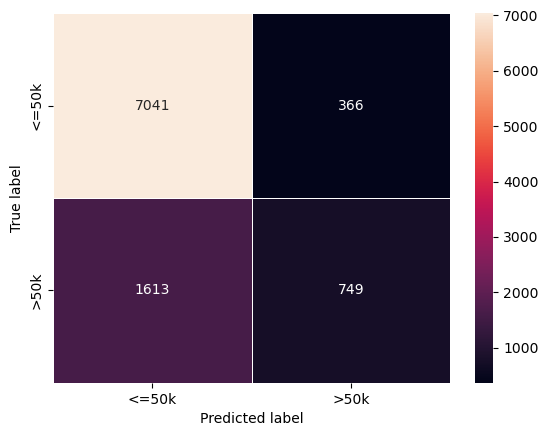

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb = gnb.fit(X_train, y_train)

# y_pred
y_pred = gnb.predict(X_test)

con_matrix = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(con_matrix, linewidths=.5, annot=True, fmt='')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_xticklabels(['<=50k', '>50k'])
ax.set_yticklabels(['<=50k', '>50k'])
plt.show()

In [22]:
print(classification_report(y_test, y_pred))
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

              precision    recall  f1-score   support

       <=50K       0.81      0.95      0.88      7407
        >50K       0.67      0.32      0.43      2362

    accuracy                           0.80      9769
   macro avg       0.74      0.63      0.65      9769
weighted avg       0.78      0.80      0.77      9769

Model accuracy score: 0.7974


Przprowadź uczenie klasyfikatora dla kolumn *race* i *native_country*. Podaj dokładnosć modeli i macierze błędu wraz z ich wykresami i interpretacją. Przedstaw wnioski od czego zależą otrzymane wyniki

## Kolumna 'race'

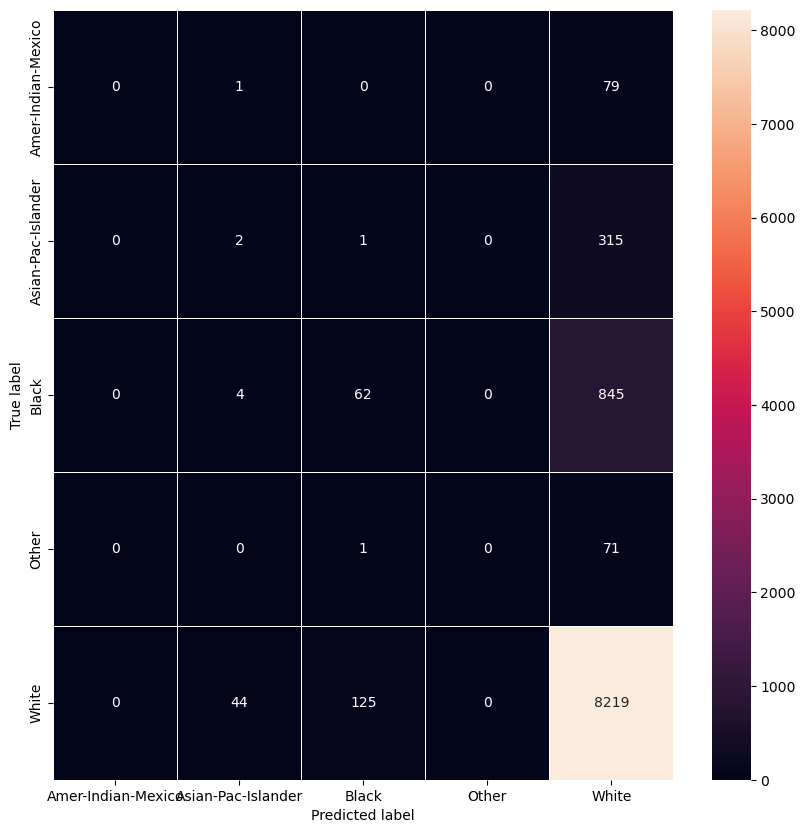

In [23]:
X = df.loc[:, df.columns != 'race']
y = df['race']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

encoder = ce.OneHotEncoder()

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb = gnb.fit(X_train, y_train)

# y_pred
y_pred = gnb.predict(X_test)

con_matrix = confusion_matrix(y_test, y_pred)
# cross_tab = pd.crosstab(y_test, y_pred)

fig = plt.figure(figsize=(10, 10))
ax = sns.heatmap(con_matrix, annot=True, fmt='', linewidths=.5)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_xticklabels(['Amer-Indian-Mexico', 'Asian-Pac-Islander', 'Black', 'Other', 'White'])
ax.set_yticklabels(['Amer-Indian-Mexico', 'Asian-Pac-Islander', 'Black', 'Other', 'White'])
plt.show()

In [24]:
print(classification_report(y_test, y_pred, zero_division=0))
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

                     precision    recall  f1-score   support

 Amer-Indian-Eskimo       0.00      0.00      0.00        80
 Asian-Pac-Islander       0.04      0.01      0.01       318
              Black       0.33      0.07      0.11       911
              Other       0.00      0.00      0.00        72
              White       0.86      0.98      0.92      8388

           accuracy                           0.85      9769
          macro avg       0.25      0.21      0.21      9769
       weighted avg       0.77      0.85      0.80      9769

Model accuracy score: 0.8479


## Kolumna 'native_country'

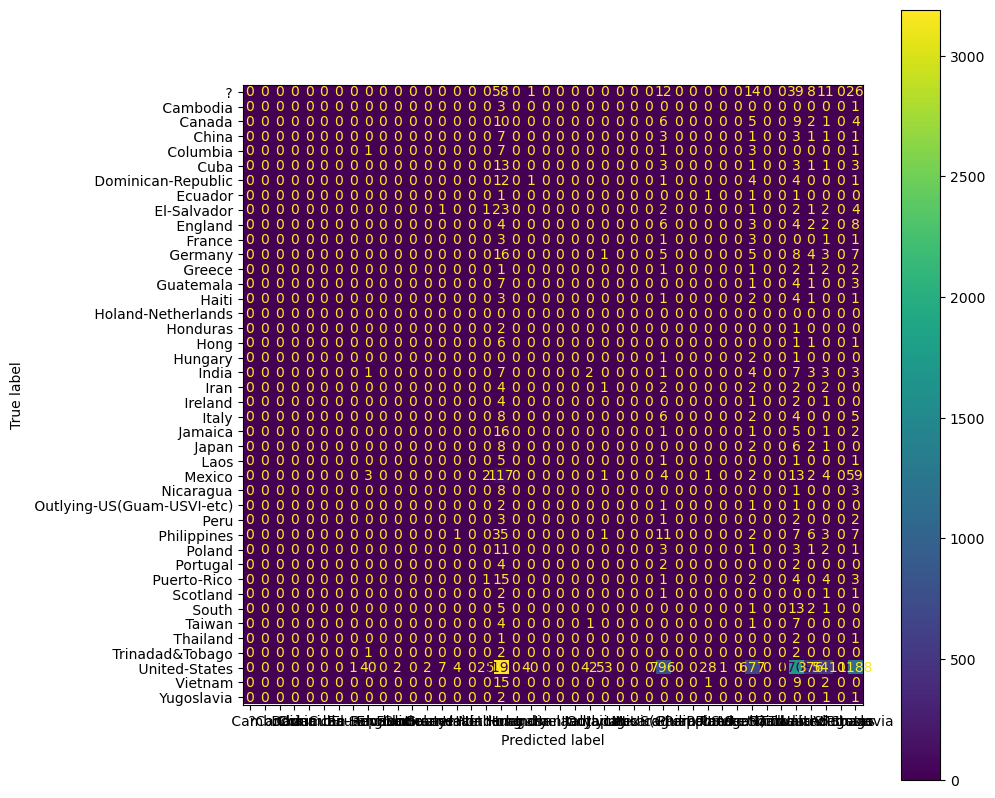

In [25]:
X = df.loc[:, df.columns != 'native_country']
y = df['native_country']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

encoder = ce.OneHotEncoder()

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb = gnb.fit(X_train, y_train)

# y_pred
y_pred = gnb.predict(X_test)

con_matrix = confusion_matrix(y_test, y_pred, labels=gnb.classes_)

# sns.heatmap(con_matrix, linewidths=.5)
# plt.show()
heatmap = ConfusionMatrixDisplay(confusion_matrix=con_matrix, display_labels=gnb.classes_)
fig, ax = plt.subplots(figsize=(10, 10))
heatmap.plot(ax=ax)
plt.show()

In [26]:
print(classification_report(y_test, y_pred, zero_division=0))
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

                             precision    recall  f1-score   support

                          ?       0.00      0.00      0.00       169
                   Cambodia       0.00      0.00      0.00         4
                     Canada       0.00      0.00      0.00        37
                      China       0.00      0.00      0.00        17
                   Columbia       0.00      0.00      0.00        13
                       Cuba       0.00      0.00      0.00        25
         Dominican-Republic       0.00      0.00      0.00        23
                    Ecuador       0.00      0.00      0.00         4
                El-Salvador       0.00      0.00      0.00        37
                    England       0.00      0.00      0.00        29
                     France       0.00      0.00      0.00         9
                    Germany       0.00      0.00      0.00        49
                     Greece       0.00      0.00      0.00        10
                  Guatemala      

Wnioski

Na zajęciach zapoznałem się z konstrukcją naiwnego klasyfikatora bayesowskiego. Plik z danymi zawierał kilkanaście kolumn opisujących dane różnych osób, m. in.: wiek, zawód, kraj pochodzenia itp. wraz z przyporządkowaniem zarobków do jednej z dwóch wartości w kolumnie 'income'. Używając GaussiannNB (gaussowskiego naiwnego bayesa) przeprowadziłem klasyfikację danych ze zbiorów testowych i treningowych dla trzech różnych kolumn.

W przypadku uczenia kolumny 'income' otrzymałem najdokładniejszy model o dokładności 79%. Jest to spowodowane tym, że dane są przyporządkowanego tylko do dwóch wartości (>50k i <=50k) i w przypadku obu, jest wystarczającao danych, aby klasyfikacja była na tyle dokładna. Z drugiej strony, jedna z danych występuję o wiele częściej i ma to wpływ na pozytywne przewidzenie wyniku - 81% do 67%. Wyniki zostały zwizualizowane jako confusion matrix.

Uczenie kolumny 'race', nie było już na tyle dokładne, głównie z powodu, że większość danych należała do tej samej grupy, więc pozytywne przewidzenie wartości występujących rzadko zachodziło z prawie zerowym prawdopodobieńswtem i było jedynie zadowalające dla danej 'White' - dokładność 86%.

Uczenie kolumny 'native_country' wypadło najgorzej, przez to, że występowało kilkadziesiąt różnych wartości, gdzie większość z nich zawiera bardzo mało rekordów w stosunku do wszystkich wierszy. Dodatkowo, bardzo problematyczne okazało się zwizualizowanie czytelnego wykresu dla 'confusion_matrix' z racji na dużą ilość różnych wartości w tej macierzy.